In [13]:
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display

### Task 1: Select what features you'll use.
- features_list is a list of strings, each of which is a feature name.
- The first feature must be "poi".

In [6]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)



#### Dataset exploration

##### Preparing the dataframe

In [58]:
# Loading the data into a Pandas dataframe
df_people = pd.DataFrame(data_dict).transpose()

In [59]:
# compare the original dictionary 
# with the dictionary reconstructed from the dataframe:  
print(df_people.to_dict('index') == data_dict)

True


In [60]:
# Taking a look at the data types
df_people.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
bonus                        146 non-null object
deferral_payments            146 non-null object
deferred_income              146 non-null object
director_fees                146 non-null object
email_address                146 non-null object
exercised_stock_options      146 non-null object
expenses                     146 non-null object
from_messages                146 non-null object
from_poi_to_this_person      146 non-null object
from_this_person_to_poi      146 non-null object
loan_advances                146 non-null object
long_term_incentive          146 non-null object
other                        146 non-null object
poi                          146 non-null object
restricted_stock             146 non-null object
restricted_stock_deferred    146 non-null object
salary                       146 non-null object
shared_receipt_with_poi      146 non-null objec

Looks like the data types are not set correctly. I'll have to clean that up before continuing.

In [61]:
# Taking a look at some records

display(df_people.head())
display(df_people.tail())

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
WINOKUR JR. HERBERT S,NaN,NaN,-25000,108579,NaN,NaN,1413,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,84992,NaN
WODRASKA JOHN,NaN,NaN,NaN,NaN,john.wodraska@enron.com,NaN,NaN,NaN,NaN,NaN,...,NaN,189583,False,NaN,NaN,NaN,NaN,NaN,189583,NaN
WROBEL BRUCE,NaN,NaN,NaN,NaN,NaN,139130,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,139130
YEAGER F SCOTT,NaN,NaN,NaN,NaN,scott.yeager@enron.com,8308552,53947,NaN,NaN,NaN,...,NaN,147950,True,3576206,NaN,158403,NaN,NaN,360300,11884758
YEAP SOON,NaN,NaN,NaN,NaN,NaN,192758,55097,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,55097,192758


In [62]:
# Setting proper NaN values
df_people.replace(to_replace='NaN', value=np.nan, inplace=True)

In [63]:
# Taking a look at the data types again
df_people.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
bonus                        82 non-null float64
deferral_payments            39 non-null float64
deferred_income              49 non-null float64
director_fees                17 non-null float64
email_address                111 non-null object
exercised_stock_options      102 non-null float64
expenses                     95 non-null float64
from_messages                86 non-null float64
from_poi_to_this_person      86 non-null float64
from_this_person_to_poi      86 non-null float64
loan_advances                4 non-null float64
long_term_incentive          66 non-null float64
other                        93 non-null float64
poi                          146 non-null bool
restricted_stock             110 non-null float64
restricted_stock_deferred    18 non-null float64
salary                       95 non-null float64
shared_receipt_with_poi      86 non-null float64

After converting the string value "NaN" to proper numpy format, the data types looks correct now. Email address is object (indicating string values), poi is boolean, and the rest are numeric.

##### Taking a closer look at null values 

In [64]:
# Getting counts of NaN values per colum
nan_counts = df_people.isnull().sum().sort_values(ascending=False).to_frame('count')
nan_counts['prop'] = round(nan_counts['count'] / 146,2)

nan_counts

,count,prop
loan_advances,142,0.97
director_fees,129,0.88
restricted_stock_deferred,128,0.88
deferral_payments,107,0.73
deferred_income,97,0.66
long_term_incentive,80,0.55
bonus,64,0.44
from_this_person_to_poi,60,0.41
from_poi_to_this_person,60,0.41
from_messages,60,0.41


Looks like some features might not be good to use due to lack of data points.

##### Getting more info about the features

Starting with descriptive statistics:

In [70]:
display(np.round(df_people.describe(),2))

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,82.00,39.00,49.00,17.00,1.020000e+02,95.00,86.00,86.00,86.00,4.0,66.00,93.00,1.100000e+02,18.00,95.00,86.00,86.00,1.250000e+02,1.260000e+02
mean,2374234.61,1642674.15,-1140475.14,166804.88,5.987054e+06,108728.92,608.79,64.90,41.23,41962500.0,1470361.45,919064.97,2.321741e+06,166410.56,562194.29,1176.47,2073.86,5.081526e+06,6.773957e+06
std,10713327.97,5161929.97,4025406.38,319891.41,3.106201e+07,533534.81,1841.03,86.98,100.07,47083208.7,5942759.32,4589252.91,1.251828e+07,4201494.31,2716369.15,1178.32,2582.70,2.906172e+07,3.895777e+07
min,70000.00,-102500.00,-27992891.00,3285.00,3.285000e+03,148.00,12.00,0.00,0.00,400000.0,69223.00,2.00,-2.604490e+06,-7576788.00,477.00,2.00,57.00,1.480000e+02,-4.409300e+04
25%,431250.00,81573.00,-694862.00,98784.00,5.278862e+05,22614.00,22.75,10.00,1.00,1600000.0,281250.00,1215.00,2.540180e+05,-389621.75,211816.00,249.75,541.25,3.944750e+05,4.945102e+05
50%,769375.00,227449.00,-159792.00,108579.00,1.310814e+06,46950.00,41.00,35.00,8.00,41762500.0,442035.00,52382.00,4.517400e+05,-146975.00,259996.00,740.50,1211.00,1.101393e+06,1.102872e+06
75%,1200000.00,1002671.50,-38346.00,113784.00,2.547724e+06,79952.50,145.50,72.25,24.75,82125000.0,938672.00,362096.00,1.002370e+06,-75009.75,312117.00,1888.25,2634.75,2.093263e+06,2.949847e+06
max,97343619.00,32083396.00,-833.00,1398517.00,3.117640e+08,5235198.00,14368.00,528.00,609.00,83925000.0,48521928.00,42667589.00,1.303223e+08,15456290.00,26704229.00,5521.00,15149.00,3.098866e+08,4.345095e+08


In [86]:
df_people['poi'].value_counts()

False    128
True      18
Name: poi, dtype: int64

The dataset contains 18 known POIs, which is roughly 12% of the people in the dataset. It makes sense to focus on the differences between the POIs and non-POIs for feature selection.

In [66]:
# bonus to salary ratio
df_people['bonus'] / df_people['salary']

ALLEN PHILLIP K                  20.672922
BADUM JAMES P                          NaN
BANNANTINE JAMES M                     NaN
BAXTER JOHN C                     4.492666
BAY FRANKLIN R                    1.668955
BAZELIDES PHILIP J                     NaN
BECK SALLY W                      3.025980
BELDEN TIMOTHY N                 24.532820
BELFER ROBERT                          NaN
BERBERIAN DAVID                        NaN
BERGSIEKER RICHARD P              1.330339
BHATNAGAR SANJAY                       NaN
BIBI PHILIPPE A                   4.681100
BLACHMAN JEREMY M                 3.419890
BLAKE JR. NORMAN P                     NaN
BOWEN JR RAYMOND M                4.845639
BROWN MICHAEL                          NaN
BUCHANAN HAROLD G                 2.015991
BUTTS ROBERT H                    2.867893
BUY RICHARD B                     2.722768
CALGER CHRISTOPHER F              5.204235
CARTER REBECCA C                  1.145874
CAUSEY RICHARD A                  2.408542
CHAN RONNIE

bonus                                                          \
      count        mean          std       min       25%        50%   
poi                                                                   
False  66.0  2446776.35  11917761.23   70000.0  400000.0   725000.0   
True   16.0  2074999.94   2047437.32  200000.0  775000.0  1275000.0   

                              
             75%         max  
poi                           
False  1000000.0  97343619.0  
True   2062500.0   7000000.0

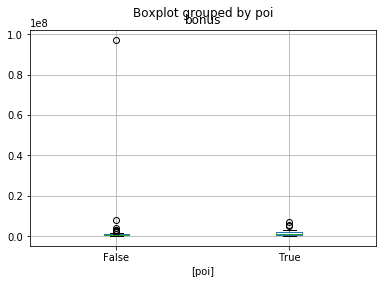

deferral_payments                                                        \
                  count        mean         std       min       25%       50%   
poi                                                                             
False              34.0  1807788.85  5510228.01 -102500.0  87468.75  382532.5   
True                5.0   519894.20   912889.50   10259.0  27610.00  202911.0   

                               
              75%         max  
poi                            
False  1066353.75  32083396.0  
True    214678.00   2144013.0

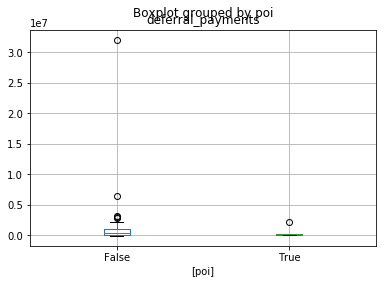

deferred_income                                                  \
                count        mean         std         min         25%   
poi                                                                     
False            38.0 -1170916.68  4531596.79 -27992891.0  -581243.75   
True             11.0 -1035313.45  1334971.88  -3504386.0 -1860244.50   

                                   
            50%       75%     max  
poi                                
False -123142.0  -37086.0 -1042.0  
True  -262500.0 -122031.0  -833.0

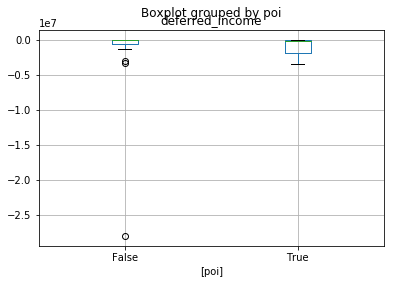

director_fees                                                   \
              count       mean        std     min      25%       50%   
poi                                                                    
False          17.0  166804.88  319891.41  3285.0  98784.0  108579.0   

                            
            75%        max  
poi                         
False  113784.0  1398517.0

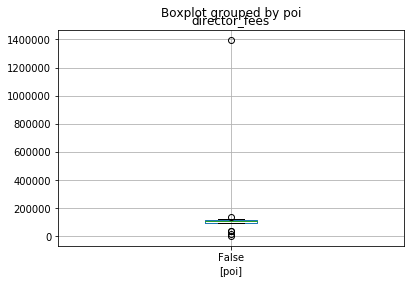

email_address                                     
              count unique                      top freq
poi                                                     
False            93     93      bob.butts@enron.com    1
True             18     18  raymond.bowen@enron.com    1

ValueError: num must be 1 <= num <= 0, not 1

<Figure size 432x288 with 0 Axes>

In [119]:
#Looking for differences between POIs and others
for ind in df_people:
    if ind != 'poi':
        df_temp = df_people[['poi', ind]].dropna().copy()
        display(np.round(df_temp.groupby('poi').describe(),2))
        df_temp.boxplot(by='poi')
        plt.show()

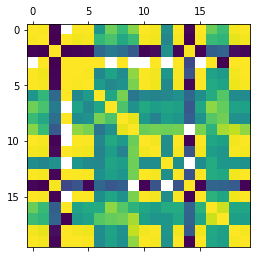

In [95]:
plt.matshow(df_people.corr())

In [101]:
# making dataframes for pois and non-pois
df_poi = df_people[df_people['poi'] == True]
df_non = df_people[df_people['poi'] == False]

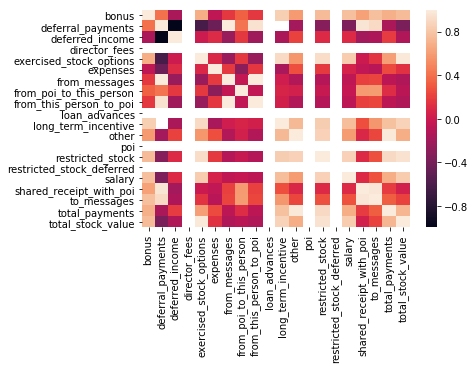

In [104]:
import seaborn as sns

corr_poi = df_poi.corr()

sns.heatmap(corr_poi, 
        xticklabels=corr_poi.columns,
        yticklabels=corr_poi.columns)

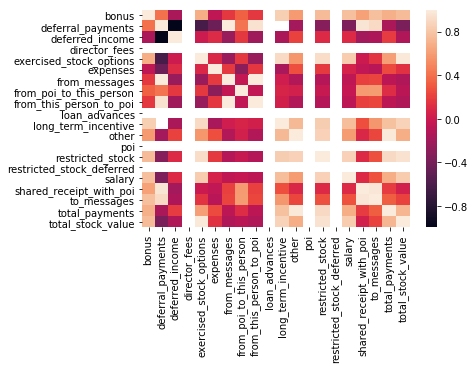

In [105]:
corr_non = df_poi.corr()

sns.heatmap(corr_non, 
        xticklabels=corr_non.columns,
        yticklabels=corr_non.columns)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118690470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c69b5f8>]], dtype=object)

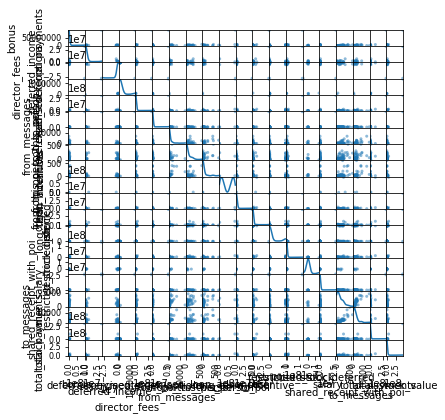

In [106]:
pd.plotting.scatter_matrix(df_people, figsize=(6, 6), diagonal='kde')

{'boxes': [<matplotlib.lines.Line2D at 0x11e649208>,
 'caps': [<matplotlib.lines.Line2D at 0x11e415f60>,
 'fliers': [<matplotlib.lines.Line2D at 0x11e63acf8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11e64f2e8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x11e3fc860>,
  <matplotlib.lines.Line2D at 0x11eba3438>]}

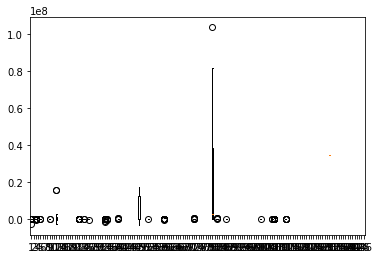

In [117]:
plt.boxplot(df_people.loc[:,df_people.columns.difference(['email_address'])])


# df_people.loc[:,df_people.columns.difference(['email_address'])]

# df_people.columns.difference(['email_address'])

In [68]:
df_people.sort_values('deferred_income')

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
TOTAL,97343619.0,32083396.0,-27992891.0,1398517.0,NaN,311764000.0,5235198.0,NaN,NaN,NaN,...,48521928.0,42667589.0,False,130322299.0,-7576788.0,26704229.0,NaN,NaN,309886585.0,434509511.0
RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,4.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
FREVERT MARK A,2000000.0,6426990.0,-3367011.0,NaN,mark.frevert@enron.com,10433518.0,86987.0,21.0,242.0,6.0,...,1617011.0,7427621.0,False,4188667.0,NaN,1060932.0,2979.0,3275.0,17252530.0,14622185.0
HANNON KEVIN P,1500000.0,NaN,-3117011.0,NaN,kevin.hannon@enron.com,5538001.0,34039.0,32.0,32.0,21.0,...,1617011.0,11350.0,True,853064.0,NaN,243293.0,1035.0,1045.0,288682.0,6391065.0
ALLEN PHILLIP K,4175000.0,2869717.0,-3081055.0,NaN,phillip.allen@enron.com,1729541.0,13868.0,2195.0,47.0,65.0,...,304805.0,152.0,False,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0
BELDEN TIMOTHY N,5249999.0,2144013.0,-2334434.0,NaN,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,108.0,...,NaN,210698.0,True,157569.0,NaN,213999.0,5521.0,7991.0,5501630.0,1110705.0
BAXTER JOHN C,1200000.0,1295738.0,-1386055.0,NaN,NaN,6680544.0,11200.0,NaN,NaN,NaN,...,1586055.0,2660303.0,False,3942714.0,NaN,267102.0,NaN,NaN,5634343.0,10623258.0
FASTOW ANDREW S,1300000.0,NaN,-1386055.0,NaN,andrew.fastow@enron.com,NaN,55921.0,NaN,NaN,NaN,...,1736055.0,277464.0,True,1794412.0,NaN,440698.0,NaN,NaN,2424083.0,1794412.0
DERRICK JR. JAMES V,800000.0,NaN,-1284000.0,NaN,james.derrick@enron.com,8831913.0,51124.0,909.0,64.0,20.0,...,484000.0,7482.0,False,1787380.0,-1787380.0,492375.0,1401.0,2181.0,550981.0,8831913.0
HAEDICKE MARK E,1150000.0,2157527.0,-934484.0,NaN,mark.haedicke@enron.com,608750.0,76169.0,1941.0,180.0,61.0,...,983346.0,52382.0,False,524169.0,-329825.0,374125.0,1847.0,4009.0,3859065.0,803094.0


In [82]:
def boxplots_by_poi():
    for ind in df_people:
        if ind == 'email_address':
            continue
        if ind != 'poi':
            print('\n', ind)
            df_temp = df_people[['poi', ind]].dropna().copy()
            quantile = df_people[ind].quantile(.9)
            ax = df_temp.boxplot(by = 'poi')
            ax.set_ylim(0, quantile)
            plt.show()
            


 bonus


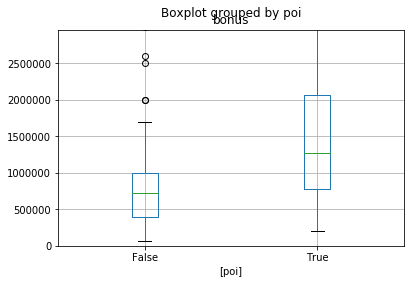


 deferral_payments


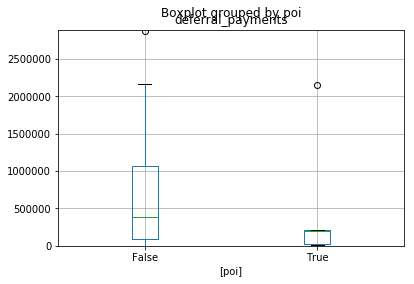


 deferred_income


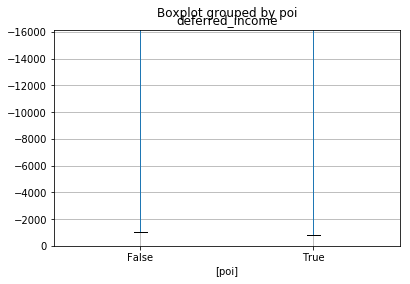


 director_fees


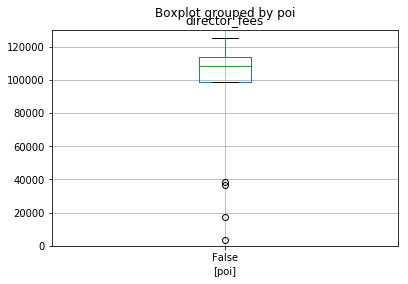


 exercised_stock_options


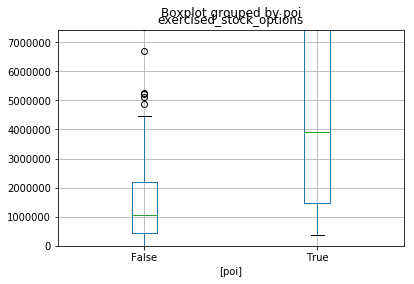


 expenses


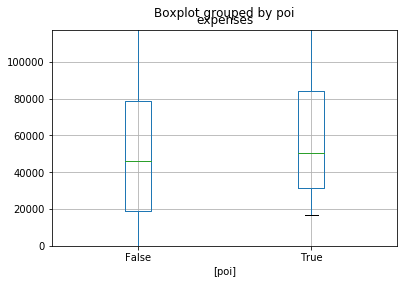


 from_messages


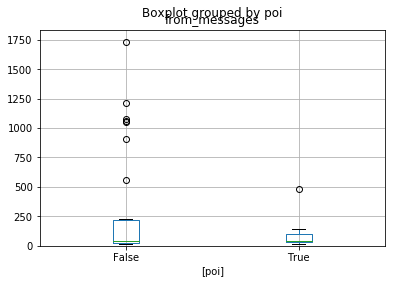


 from_poi_to_this_person


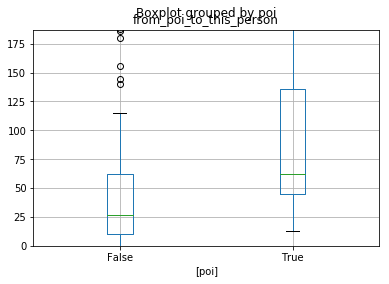


 from_this_person_to_poi


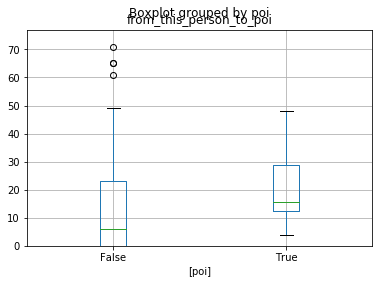


 loan_advances


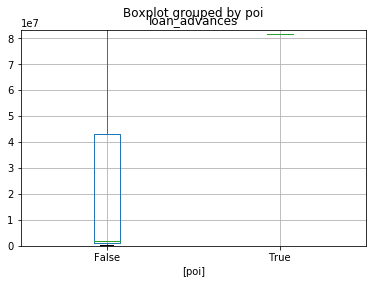


 long_term_incentive


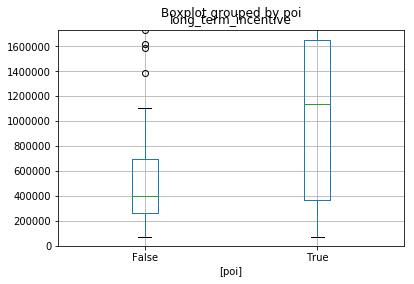


 other


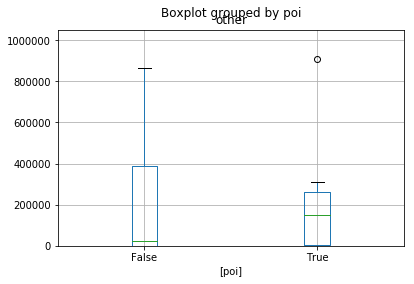


 restricted_stock


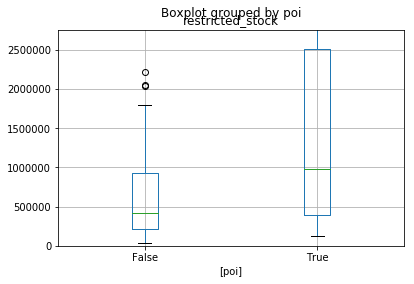


 restricted_stock_deferred


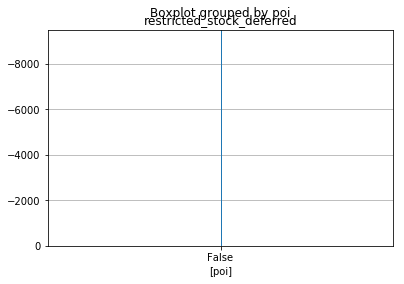


 salary


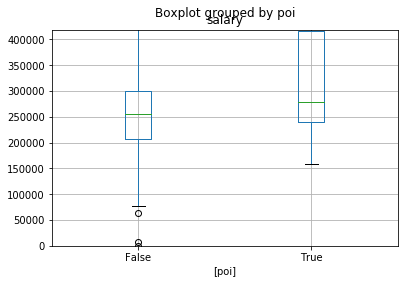


 shared_receipt_with_poi


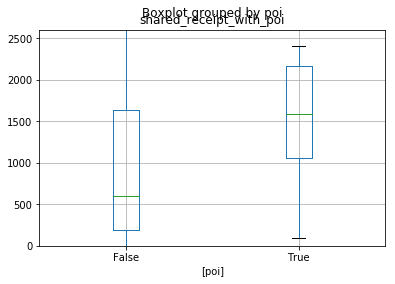


 to_messages


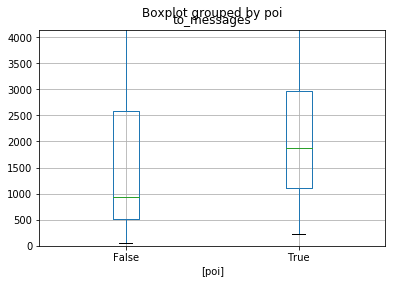


 total_payments


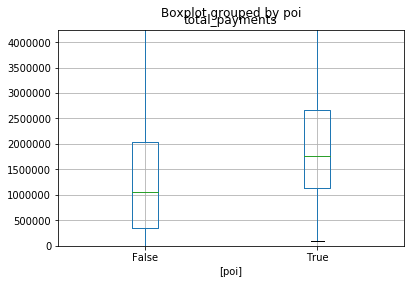


 total_stock_value


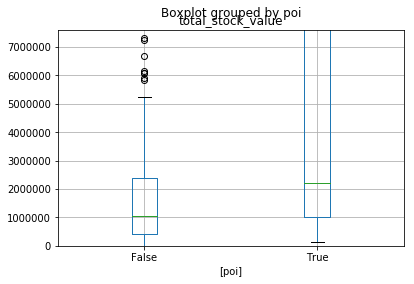

In [83]:
boxplots_by_poi()

### Task 2: Remove outliers


### Task 3: Create new feature(s)
- Store to my_dataset for easy export below.

In [ ]:
my_dataset = data_dict

In [ ]:
### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)



### Task 4: Try a varity of classifiers
- Please name your classifier clf for easy export below.
- Note that if you want to do PCA or other multi-stage operations,
- you'll need to use Pipelines. For more info:
    - http://scikit-learn.org/stable/modules/pipeline.html

In [ ]:
# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()



### Task 5: Tune your classifier
- Tune your classifier to achieve better than .3 precision and recall using our testing script.
- Check the tester.py script in the final project folder for details on the evaluation method, especially the test_classifier function. 
- Because of the small size of the dataset, the script uses stratified shuffle split cross validation. For more info:
    - [scikit-learn documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html)

In [ ]:
# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)


### Task 6: Prepare files for project submission
- Dump your classifier, dataset, and features_list so anyone can check your results. 
- You do not need to change anything below, but make sure that the version of poi_id.py that you submit can be run on its own and generates the necessary .pkl files for validating your results.

In [ ]:

dump_classifier_and_data(clf, my_dataset, features_list)

### Sources


##### Udacity forum threads
[EDA on financial features](https://discussions.udacity.com/t/eda-on-financial-features/192556/7)  
[Pickling Pandas df](https://discussions.udacity.com/t/pickling-pandas-df/174753/23)